In [213]:
## Libraries

from math import *
import numpy as np
from numpy.random import *
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from models import Models
from models_dict_v2 import model_dict
from generate_synthetic_df import generate_synthetic_df

In [214]:
## Create dataframe

npol = 10
nper = 5

# Creates synthetic dataframe
df = generate_synthetic_df(npol*nper, 0)

# Instantiate an object from the class "Models"
models = Models(model_dict)

# Calculate the cost and price
cost = models.calculate_cost(df)
pricing = models.calculate_pricing(df)

# Calculate the profit on the synthetic dataframe
df["profit"] = models.calculate_profit(cost, pricing)

# Create identification variable
df["unique_id"] = np.tile(np.arange(npol), nper)

# Create time period variable
df["year"] = np.repeat(np.arange(nper), npol)

# Do one-hot encoding on the categorical variables
df = pd.get_dummies(df)
df = df.drop("MARITAL_STATUS_Not_Single", axis=1)

[Text(0.5, 0.875, 'DRIVER_AGE <= 52.5\nsquared_error = 3483.023\nsamples = 50\nvalue = 3.602'),
 Text(0.25, 0.625, 'NUMBER_OF_CLAIMS_PAST_5YEARS <= 1.5\nsquared_error = 2651.395\nsamples = 29\nvalue = -29.508'),
 Text(0.125, 0.375, 'VEHICLE_AGE <= 13.0\nsquared_error = 856.59\nsamples = 24\nvalue = -11.745'),
 Text(0.0625, 0.125, 'squared_error = 629.649\nsamples = 18\nvalue = -22.693'),
 Text(0.1875, 0.125, 'squared_error = 99.054\nsamples = 6\nvalue = 21.1'),
 Text(0.375, 0.375, 'VEHICLE_PRICE <= 24466.0\nsquared_error = 2481.943\nsamples = 5\nvalue = -114.772'),
 Text(0.3125, 0.125, 'squared_error = 207.864\nsamples = 3\nvalue = -75.65'),
 Text(0.4375, 0.125, 'squared_error = 153.581\nsamples = 2\nvalue = -173.455'),
 Text(0.75, 0.625, 'DRIVER_AGE <= 68.0\nsquared_error = 1026.946\nsamples = 21\nvalue = 49.325'),
 Text(0.625, 0.375, 'VEHICLE_AGE <= 5.5\nsquared_error = 587.646\nsamples = 15\nvalue = 35.053'),
 Text(0.5625, 0.125, 'squared_error = 343.976\nsamples = 7\nvalue = 16.199

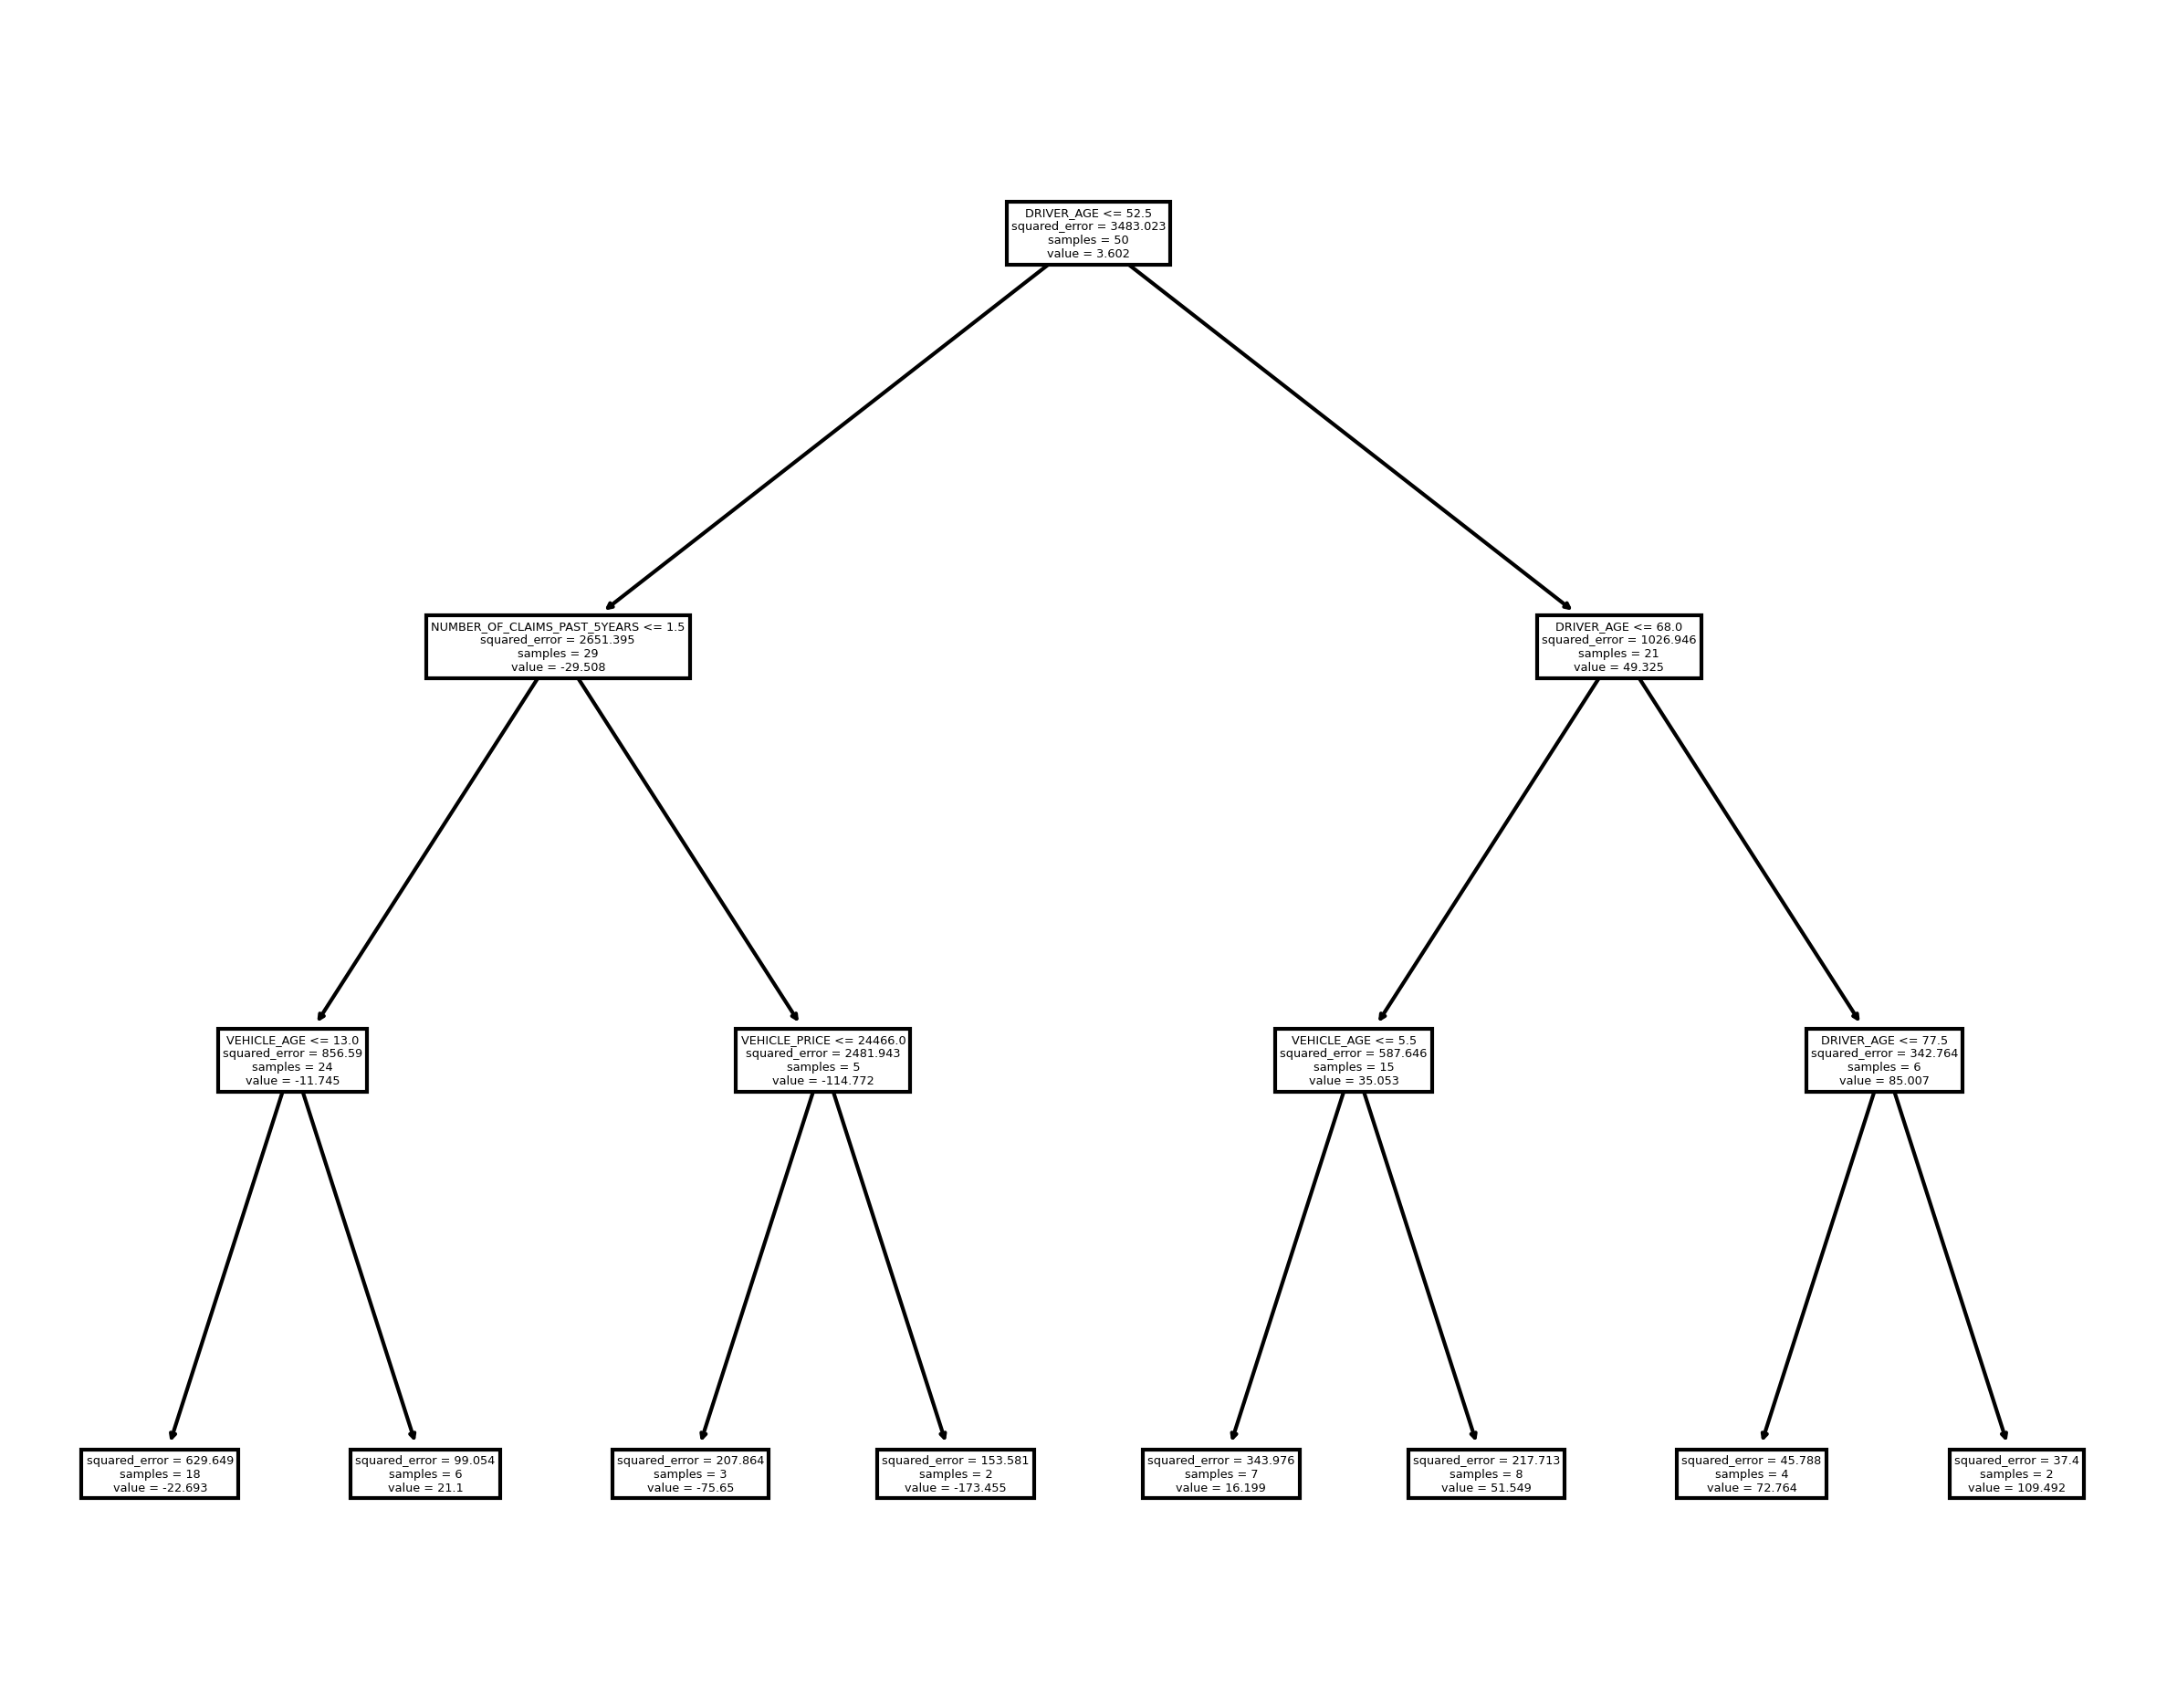

In [215]:
## Fit the regression tree

# Create the tree
X = df.drop(["unique_id", "profit", "year"], axis=1)
y = df["profit"]
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X,y)

# Plot the tree
plt.figure(figsize=(10,8), dpi=300)
plot_tree(tree, feature_names=X.columns)

In [217]:
## Calculate the transition matrix (RUN THIS CHUNK TWICE BECAUSE SOMEHOW IT DOESN'T WORK THE FIRST TIME BUT IT DOES THE SECOND TIME)

# Create a matrix of the evolution of states
leaves = tree.apply(X)
for i in range(len(values)): leaves[np.where(leaves==values[i])[0]] = i
states = pd.DataFrame(np.split(leaves, nper))
states = states.transpose()
values = np.unique(leaves)
df["groups"] = leaves

# Calculate the transition matrix from the states matrix
prob = pd.DataFrame(0, index = np.arange(len(values)), columns = np.arange(len(values)))
for j in range(len(states.index)):
    trans = states.loc[j]
    for k in range(len(trans) - 1): prob.iat[trans[k], trans[k+1]] += 1
prob = prob.div(prob.sum(axis=1), axis=0)

In [218]:
## Create a function to calculate the CLV for one trajectory

profits = np.unique(tree.predict(X))
def CLV_traj(a, gam, p_client):
    CLV = 0
    St = a
    t = 0
    while True:
        c = rand()
        if c > p_client: break
        else :
            t += 1
            probs = prob.loc[St]
            St = choice(len(probs), 1, p = probs)[0]
            CLV += gam**t*profits[St]
    return(CLV)

In [219]:
## Simulate N trajectories

def CLV_MC(N, a, gam, p_client):
    CLV_vec = []
    for i in range(N): CLV_vec.append(CLV_traj(a, gam, p_client))
    return(sum(CLV_vec)/N)

CLV_MC(3000, 0, 1/1.15, 0.85)

-125.09803615786397

In [208]:
states

,0,1,2,3,4
0,1,1,5,0,2
1,4,0,0,5,6
2,0,3,6,4,5
3,0,2,1,0,5
4,0,4,4,6,5
5,5,0,0,7,5
6,0,0,0,6,2
7,4,5,1,0,7
8,1,3,0,0,0
9,1,0,0,4,4


In [209]:
prob

,0,1,2,3,4,5,6,7
0,0.411765,0.000000,0.117647,0.058824,0.117647,0.117647,0.058824,0.117647
1,0.500000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
4,0.166667,0.000000,0.000000,0.000000,0.333333,0.333333,0.166667,0.000000
5,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
6,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
